In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from utils import load_data, transform_data
from data_vis import plot_candlestick, plot_time_series, plot_normalized_pair, plot_series
from comp_utils import find_best_pair_for_ticker, get_pairs, get_residuals

In [3]:
btc_data = transform_data(load_data("BTCUSDT"))
eth_data = transform_data(load_data("ETHUSDT"))
ada_data = transform_data(load_data("ADAUSDT"))
bnb_data = transform_data(load_data("BNBUSDT"))
doge_data = transform_data(load_data("DOGEUSDT"))
link_data = transform_data(load_data("LINKUSDT"))
sol_data = transform_data(load_data("SOLUSDT"))
wbtc_data = transform_data(load_data("WBTC"))
xrp_data = transform_data(load_data("XRPUSDT"))
usdc_data = transform_data(load_data("USDCUSDT"))
avax_data = transform_data(load_data("AVAXUSDT"))
bch_data = transform_data(load_data("BCHUSDT"))
dai_data = transform_data(load_data("DAIUSDT"))
ltc_data = transform_data(load_data("LTCUSDT"))
xlm_data = transform_data(load_data("XLMUSDT"))

In [4]:
#Candlestick charts for visualization
plot_candlestick(btc_data, "BTCUSDT", start_idx=0, end_idx=200)

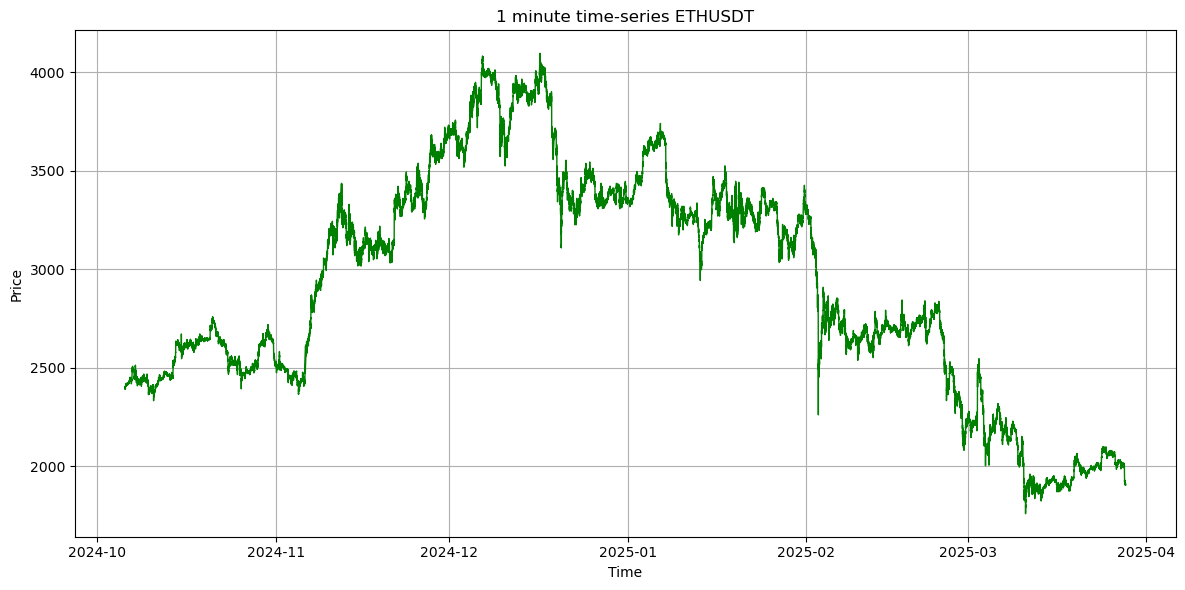

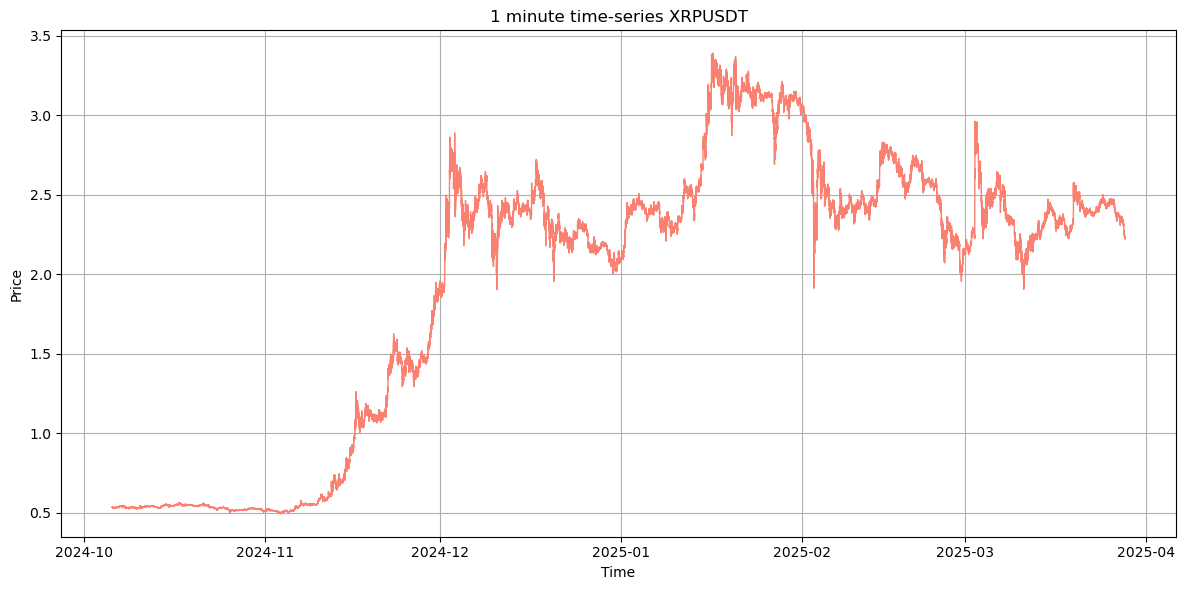

In [5]:
#visualize the mid-price time-series 
plot_time_series(eth_data, ticker="ETHUSDT", color='green', start_idx=400000, end_idx=650000)
plot_time_series(xrp_data, ticker="XRPUSDT", color='salmon', start_idx=400000, end_idx=650000)

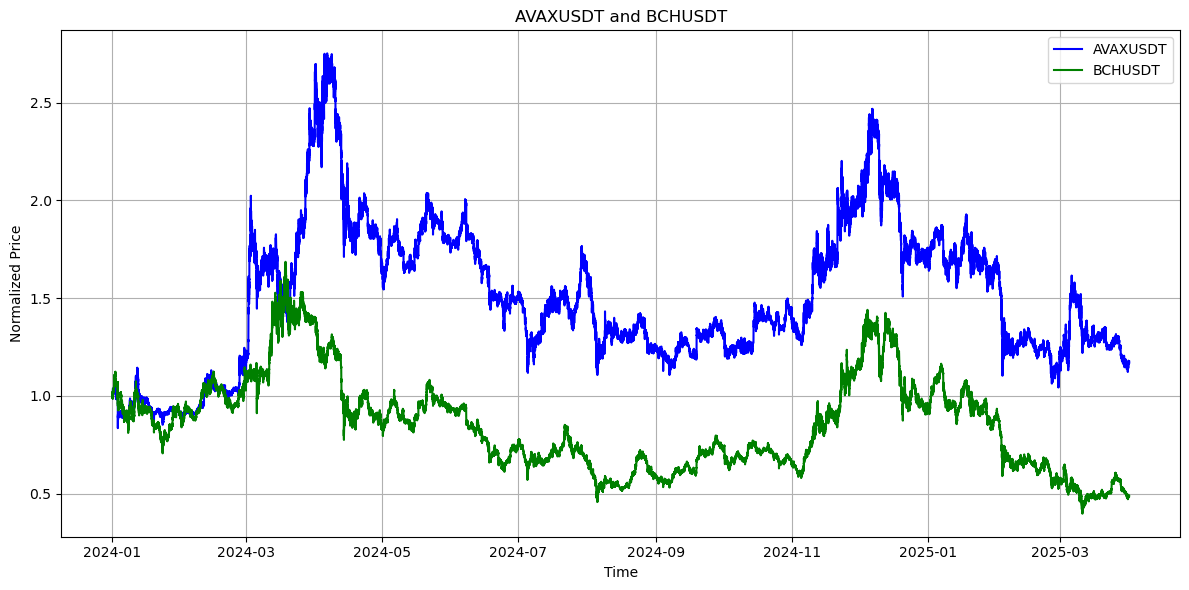

In [6]:
# visualize the normalized time-series of two assets on a normalized y-axis 
plot_normalized_pair(bch_data, avax_data, title="AVAXUSDT and BCHUSDT", label1="AVAXUSDT", label2="BCHUSDT")

In [7]:
data_dict = {
    "BTCUSDT": btc_data, 
    "ETHUSDT": eth_data, 
    "ADAUSDT": ada_data, 
    "BNBUSDT": bnb_data, 
    "DOGEUSDT": doge_data, 
    "LINKUSDT": link_data,
    "SOLUSDT": sol_data, 
    #"WBTC": wbtc_data, 
    "XRPUSDT": xrp_data, 
    "BCHUSDT": bch_data,
    #"DAIUSDT": dai_data,
    "LTCUSDT": ltc_data,
    "XLMUSDT": xlm_data,
    "AVAXUSDT": avax_data,
}

## PCA Stat Arb Implementation

In [8]:
from comp_utils import get_Y

In [ ]:
# our N x M standardized returns matrix 
Y = get_Y(data_dict)
Y

array([[-1.29616895, -1.67408114, -0.05558414, ...,  0.02176366,
         0.01948536,  0.0194953 ],
       [ 1.97244513, -0.30646456, -0.1723905 , ...,  2.16723645,
        -0.54446303, -0.00525117],
       [-0.05764572, -1.17301734, -0.03482777, ...,  0.23661429,
         0.20914344,  0.20914344],
       ...,
       [-0.06594934, -0.06594934, -0.06594934, ...,  0.03852239,
         0.03595025, -0.72019573],
       [ 0.04054583,  0.04054583,  0.04054583, ...,  0.18296666,
        -2.31390035,  0.07452145],
       [-0.21467814, -0.21273149, -0.07368981, ...,  0.03114243,
         0.03114243,  0.03114243]])

In [ ]:
# constructing the N x N correlation matrix 
M = Y.shape[1]
P = (1 / (M - 1)) * (Y @ Y.T)
P

array([[1.00701516, 0.28383315, 0.19537395, 0.14217804, 0.16452746,
        0.19314676, 0.18799641, 0.16557642, 0.06806103, 0.15456498,
        0.10462938, 0.18542363],
       [0.28383315, 1.01436651, 0.22088564, 0.15473222, 0.17757829,
        0.22774751, 0.19543047, 0.18874304, 0.07853704, 0.17396749,
        0.12442902, 0.21007312],
       [0.19537395, 0.22088564, 0.99822913, 0.12733972, 0.14017517,
        0.21194143, 0.14637634, 0.19512512, 0.07382919, 0.16755011,
        0.13773319, 0.19838639],
       [0.14217804, 0.15473222, 0.12733972, 1.00513526, 0.10789219,
        0.12548128, 0.10510056, 0.11083937, 0.05418536, 0.10708842,
        0.07232721, 0.12055667],
       [0.16452746, 0.17757829, 0.14017517, 0.10789219, 1.00140245,
        0.13638189, 0.23202835, 0.12067014, 0.06112734, 0.11576248,
        0.06836534, 0.13014333],
       [0.19314676, 0.22774751, 0.21194143, 0.12548128, 0.13638189,
        1.00780798, 0.14047039, 0.17392497, 0.07535716, 0.16765571,
        0.12794602,

In [ ]:
# computing the principal components 
eigenvalues, eigenvectors = np.linalg.eigh(P)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

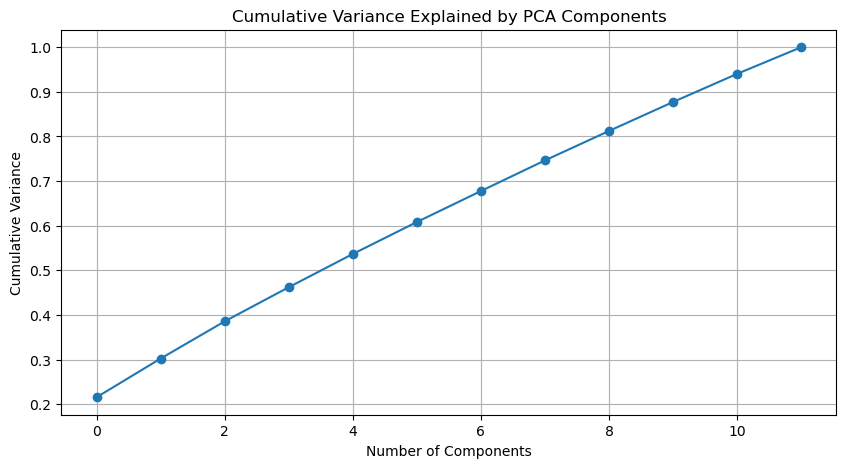

In [18]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance, marker='o')
plt.title("Cumulative Variance Explained by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.show()
